In [2]:
# This pandas file creates the visualization for a bar chart that maps disasters paid out by fiscal year

In [19]:
# We'll use Pandas and Numpy for this Program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Pull the Merged_data file created by the first pandas file

complete_df = pd.read_csv('./interim_data/Merged_data.csv')
complete_df

,address,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,incidentType,fyDeclared
0,"4116, IL, Brown (County)",32272,8.0,6.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0
1,"4116, IL, Bureau (County)",622024,260.0,251.0,9.0,0.0,0.0,29177,19.0,0.0,0.0,Flood,2013.0
2,"4116, IL, Calhoun (County)",31821,14.0,14.0,0.0,0.0,0.0,7079,4.0,0.0,0.0,Flood,2013.0
3,"4116, IL, Clark (County)",44331,11.0,9.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0
4,"4116, IL, Cook (County)",90293298,36895.0,35846.0,966.0,83.0,29.0,37099655,12965.0,35.0,1.0,Flood,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,"4466, TX, Montgomery (County)",8022615,1100.0,780.0,293.0,27.0,0.0,813403,207.0,0.0,0.0,Flood,2020.0
1124,"4466, TX, Orange (County)",9672865,1585.0,1186.0,374.0,25.0,0.0,1039349,322.0,0.0,0.0,Flood,2020.0
1125,"4466, TX, San Jacinto (County)",82351,20.0,18.0,2.0,0.0,0.0,4214,3.0,0.0,0.0,Flood,2020.0
1126,"4332, TX, Evangeline (Parish)",0,0.0,0.0,0.0,0.0,0.0,500,1.0,0.0,0.0,0,0.0


In [5]:
# Split the "Adress" column into its origianl three columns
complete_df[["Disaster", "State", "County"]] = complete_df.address.str.split(",", expand = True)
complete_df

,address,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,incidentType,fyDeclared,Disaster,State,County
0,"4116, IL, Brown (County)",32272,8.0,6.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0,4116,IL,Brown (County)
1,"4116, IL, Bureau (County)",622024,260.0,251.0,9.0,0.0,0.0,29177,19.0,0.0,0.0,Flood,2013.0,4116,IL,Bureau (County)
2,"4116, IL, Calhoun (County)",31821,14.0,14.0,0.0,0.0,0.0,7079,4.0,0.0,0.0,Flood,2013.0,4116,IL,Calhoun (County)
3,"4116, IL, Clark (County)",44331,11.0,9.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0,4116,IL,Clark (County)
4,"4116, IL, Cook (County)",90293298,36895.0,35846.0,966.0,83.0,29.0,37099655,12965.0,35.0,1.0,Flood,2013.0,4116,IL,Cook (County)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,"4466, TX, Montgomery (County)",8022615,1100.0,780.0,293.0,27.0,0.0,813403,207.0,0.0,0.0,Flood,2020.0,4466,TX,Montgomery (County)
1124,"4466, TX, Orange (County)",9672865,1585.0,1186.0,374.0,25.0,0.0,1039349,322.0,0.0,0.0,Flood,2020.0,4466,TX,Orange (County)
1125,"4466, TX, San Jacinto (County)",82351,20.0,18.0,2.0,0.0,0.0,4214,3.0,0.0,0.0,Flood,2020.0,4466,TX,San Jacinto (County)
1126,"4332, TX, Evangeline (Parish)",0,0.0,0.0,0.0,0.0,0.0,500,1.0,0.0,0.0,0,0.0,4332,TX,Evangeline (Parish)


In [6]:
# Group the data by Disaster number.  Create  a df that only takes the first value in the groupby.
# Take only the "incidentType" and "fyDeclared" columns
grouping = complete_df.groupby(complete_df["Disaster"])
first_grouping = grouping.first()
first_grouping = first_grouping.loc[:,["incidentType", "fyDeclared"]]
first_grouping

,incidentType,fyDeclared
Disaster,,
4116,Flood,2013.0
4117,Tornado,2013.0
4122,Flood,2013.0
4145,Flood,2013.0
4157,Tornado,2014.0
...,...,...
4441,Flood,2019.0
4447,Tornado,2019.0
4451,Severe Storm(s),2019.0


In [26]:
# For our first graph, we find out how many disasters were declared by each year.

first_grouping['fyDeclared'] = first_grouping['fyDeclared'].astype(int)
year_grouping = first_grouping.groupby("fyDeclared")
year_group_count = year_grouping.count()
year_group_count

,incidentType
fyDeclared,
2013,4
2014,8
2015,9
2016,13
2017,23
2018,13
2019,14
2020,1


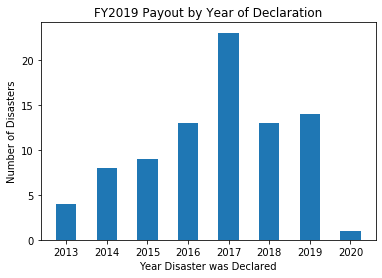

In [27]:
# Plot the data and export it to another folder.0cv x

plt.bar(year_group_count.index, year_group_count['incidentType'], width = 0.5)

plt.title("FY2019 Payout by Year of Declaration")
plt.xlabel("Year Disaster was Declared")
plt.ylabel("Number of Disasters")

plt.savefig('./output_visual/FY 2019 Payout by Year')